# Preliminary

### Background

DQLab Telco is a `telecommunication company` that has a lot of branches spread   everywhere. Since   being   built   in   2019, DQLab   Telco  has  been consistent in observing customer’s experience so the customers won't leave. Although just about a year aged, DQLab Telco has a lot of customers who `switch subscriptions out to the competitors`. Management wants to decrease the number of customers who switch out (Churn) using machine learning. For that reason, the data scientist team was asked to prepare the data and also to make a good prediction for knowing that either the customers were about to switch subscriptions out or not.

### Task Details

As a data scientist, I was asked to prepare the data before do modeling. There are two main things I have to do, `Data Cleansing` and `Modelling` with each detail as described below.

`Data Cleansing`
- Filtering a Valid Customer ID
- Handling Missing Values
- Handling Outliers
- Value Standardization

`Modelling`
- Exploratory Data Analysis (EDA)
- Data Preprocessing
- Machine Learning modelling
- Choose the best model

### Data Used

The dataset in this project has been served on `CSV format`, which can be downloaded from the link below.

https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv

The following is the explanation of each variable.

- `UpdatedAt`

Period of Data taken

- `customerID`

Customer ID

- `gender`

Whether the customer is a male or a female (Male, Female)

- `SeniorCitizen`

Whether the customer is a senior citizen or not (1, 0)

- `Partner`

Whether the customer has a partner or not (Yes, No)

- `Dependents`

Whether the customer has dependents or not (Yes, No)

- `tenure`

Number of months the customer has stayed with the company

- `PhoneService`

Whether the customer has a phone service or not (Yes, No)

- `MultipleLines`

Whether the customer has multiple lines or not (Yes, No, No phone service)

- `InternetService`

Customer’s internet service provider (DSL, Fiber optic, No)

- `OnlineSecurity`

Whether the customer has online security or not (Yes, No, No internet service)

- `OnlineBackup`

Whether the customer has online backup or not (Yes, No, No internet service)

- `DeviceProtection`

Whether the customer has device protection or not (Yes, No, No internet service)

- `TechSupport`

Whether the customer has tech support or not (Yes, No, No internet service)

- `StreamingTV`

Whether the customer has streaming TV or not (Yes, No, No internet service)

- `StreamingMovies`

Whether the customer has streaming movies or not (Yes, No, No internet service)

- `Contract`

The contract term of the customer (Month-to-month, One year, Two year)

- `PaperlessBilling`

Whether the customer has paperless billing or not (Yes, No)

- `PaymentMethod`

The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

- `MonthlyCharges`

The amount charged to the customer monthly

- `TotalCharges`

The total amount charged to the customer

- `Churn`

Whether the customer churned or not (Yes or No)

### Import Library dan Dataset

Using `Python on Jupyter Notebook`, the first thing I did before Data Cleansing was importing the library and dataset onto the workspace.

In [1]:
import pandas as pd

df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')

# Filtering a Valid Customer ID

Before doing so, let us see the shape of the dataset and compare it with the unique values of a customer ID. `Something is wrong with the data` if the number of rows is different from the number of unique values of customer ID.

In [2]:
#Showing the number of rows and columns of the dataset
df_load.shape

(7113, 22)

In [3]:
#Showing the number of unique values of ‘customerID’
df_load['customerID'].nunique()

7017

Shown that the number of rows was `7113` but the number of unique values was `7017`, so there must be something wrong with the data.

### Customer ID filter using a specific format

To clean the dataset as a whole, started by validating the customer ID whether is it the same as the specific format or not. Here is the valid format of customer ID.
- The length of ID is `11-12 characters`
- Consists `only by numbers`
- `Started by number 45` as the first two-digit

In [4]:
#Make a new column ‘valid_id’ with boolean type to validate ‘customerID’
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')

In [5]:
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,valid_id
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,True
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,True
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,True
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True


In [6]:
#Knowing all of the ‘valid_id’ values
df_load['valid_id'].value_counts()

True     7006
False     107
Name: valid_id, dtype: int64

There were 107 customers ID different from the specific format. So, delete those 107 rows to make the dataset better.

In [7]:
#Create a dataframe with true ‘customerID’ format and count the total ‘customerID’
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)

In [8]:
df_load['customerID'].count()

7006

### Filter the duplicate Customer ID

Make sure that each of the customer ID `does not duplicate`.

In [9]:
#Delete rows with the duplicate variable as a whole
df_load = df_load.drop_duplicates()

In [10]:
#Sort data by ‘UpdatedAt’ then delete rows with the duplicate ‘customerID’
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')

In [11]:
df_load['customerID'].count()

6993

The validity of Customer ID is important to make sure that the data we have is correct. Based on these results, the number of rows we loaded for the first  time  was  7113.  After  the  validity  process,   the  number  of  rows  `has been reduced to 6993`.

# Handling Missing Values

The  next  step  was  handling   the   missing   values  on   each  variable. Remember that we want to make a prediction model about Churn customers, so the first variable we checked was the Churn variable.

### Deleting the rows

Assumed that the data modeler received only the data with a filled Churn  column.  So  let  us  detect Churn column and delete the rows with an unfilled Churn column.

In [12]:
#Sum the number of missing values on ‘Churn’
df_load['Churn'].isnull().sum()

43

The number of  missing values on Churn variable was 43, continued with deleting the rows.

In [13]:
#Delete the rows based on missing values on ‘Churn’
df_load.dropna(subset=['Churn'], inplace=True)

In [14]:
#Showing the shape of the dataframe
df_load.shape

(6950, 22)

The rows of dataframe has been changed, `reduced by 43 to 6950`. That means the unfilled Churn column was succesfully deleted.

### Filling with a certain value

Another way to handling the missing values is to fill it with a certain value. Assumed that the data modeler asks to fill the missing values with these criteria below.
- Fill the tenure variable with `the value 11`
- Fill the other numeric variables with `its median`

In [15]:
df_load.isnull().values.any()

True

In [16]:
#Show the number of missing values on each variable
df_load.isnull().sum().sort_values(ascending=False)

tenure              99
MonthlyCharges      26
TotalCharges        15
Churn                0
InternetService      0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
UpdatedAt            0
dtype: int64

Three  variables  had  missing  values.  All  of  these  variables  were  the numeric type. So, let us fill the missing values with the given criteria.

In [17]:
#Fill the missing values on ‘tenure’ with 11
df_load['tenure'].fillna(11, inplace=True)

In [18]:
#Fill the missing values on ‘MonthlyCharges’ and ‘TotalCharges’ with the median of each variable
columns = ['MonthlyCharges','TotalCharges']
for i in columns:
    median = df_load[i].median()
    df_load[i].fillna(median, inplace=True)

Check the number of missing values on each variable to make sure that the missing values had been filled.

In [19]:
df_load.isnull().sum().sort_values(ascending=False)

Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
UpdatedAt           0
dtype: int64

Now we had no missing values. Filling the missing values is so important in order to make our dataset ready to be modeled.

# Handling Outliers

Our next step was handling the outliers. Outliers is an observation data appear with extreme value, whether it is invariant or multivariate. The extreme value in observation is `the value that so much different for the most of data`.

### Detect the outliers with Boxplot

One of the ways to detect outliers is to see the data plot using a `boxplot`. Boxplot is a summary of sample distribution that graphically served to show a distribution data shape (skewness), measures of central tendency, and measures of spread observation data. Use matplotlib and seaborn packages to visualize the boxplot of the data. Before we make a boxplot, let see the data description.

In [20]:
#Show the numeric variable data description
df_load[['tenure', 'MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.477266,65.783741,2305.083460
std,25.188910,50.457871,2578.651143
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,500.000000,2311.000000,80000.000000


These are the data description of numeric variables. Let us visualize the boxplot of each numeric variable.

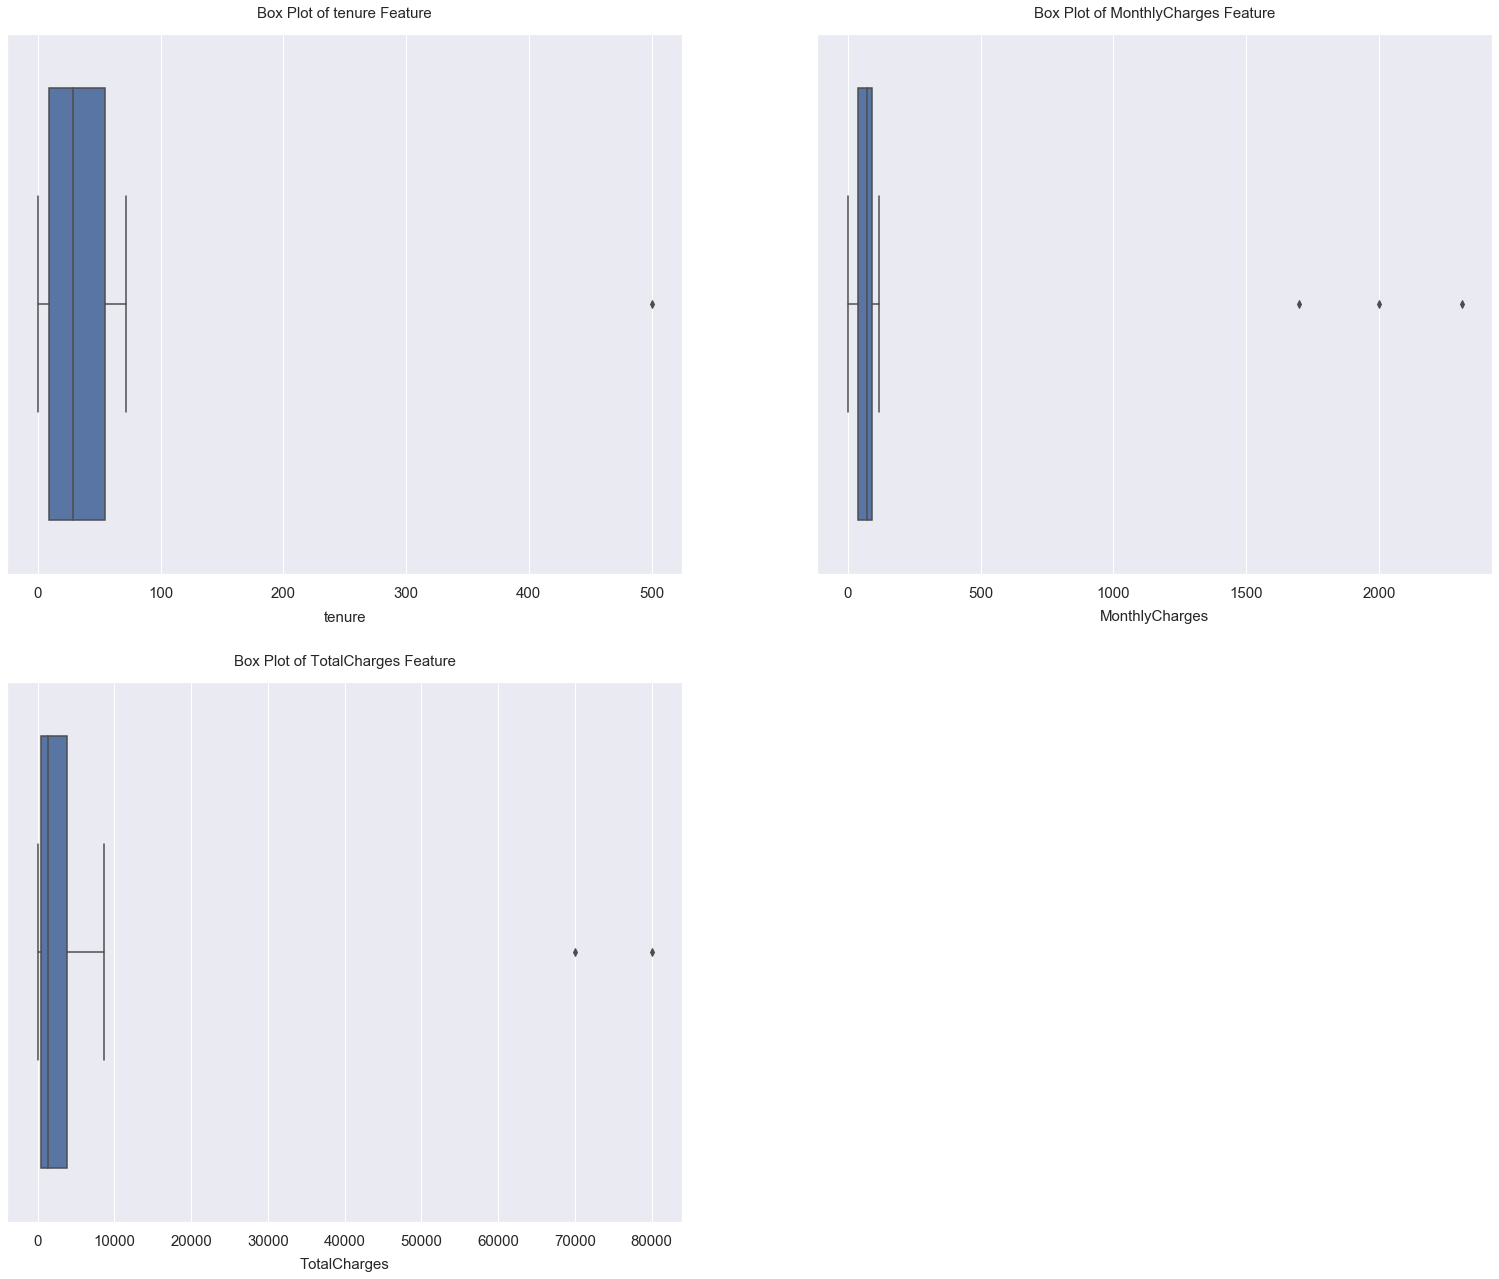

In [21]:
#Visualize the boxplot of numeric variables
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

features = ['tenure','MonthlyCharges','TotalCharges']

fig, ax = plt.subplots(figsize=(15,12))
plt.subplots_adjust(right=1.5, top=1.5)

for i, n in enumerate(features,1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_load[n])
        
    plt.xlabel('{}'.format(n), labelpad=10, size=15)
    plt.tick_params(axis='x', labelsize=15, size=8)
    plt.tick_params(axis='y', labelsize=15, size=8)
    plt.title('Box Plot of {} Feature'.format(n), y=1.02, size=15)
        
plt.show()
    

On those boxplots visualization, there were dots which far away from each boxplot. This shows that there exist the outliers.

### Solve by Interquartile Range Method

After knowing which variable has outliers, solve the outliers by `Interquartile Range (IQR)` method, made the outliers were on the interval of boxplot. Use quantile() to see a certain quantile and use mask() to replace a value.

In [22]:
#Calculate quantile values
Q1 = df_load[['tenure','MonthlyCharges','TotalCharges']].quantile(0.25)
Q3 = df_load[['tenure','MonthlyCharges','TotalCharges']].quantile(0.75)

#IQR and tolerated minimum_maximum value formulas
IQR = Q3-Q1
maximum = Q3+(1.5*IQR)
minimum = Q1-(1.5*IQR)

#Replace the outliers with minimum_maximum value made
df_load[['tenure','MonthlyCharges','TotalCharges']] = df_load[['tenure','MonthlyCharges','TotalCharges']].mask((df_load[['tenure','MonthlyCharges','TotalCharges']]>maximum), maximum, axis=1)
df_load[['tenure','MonthlyCharges','TotalCharges']] = df_load[['tenure','MonthlyCharges','TotalCharges']].mask((df_load[['tenure','MonthlyCharges','TotalCharges']]<minimum), minimum, axis=1)

In [23]:
#Melihat deskripsi data setelah me-replace nilai outlier
df_load[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.423165,64.992201,2286.058750
std,24.581073,30.032040,2265.702553
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,124.000000,169.931250,8889.131250


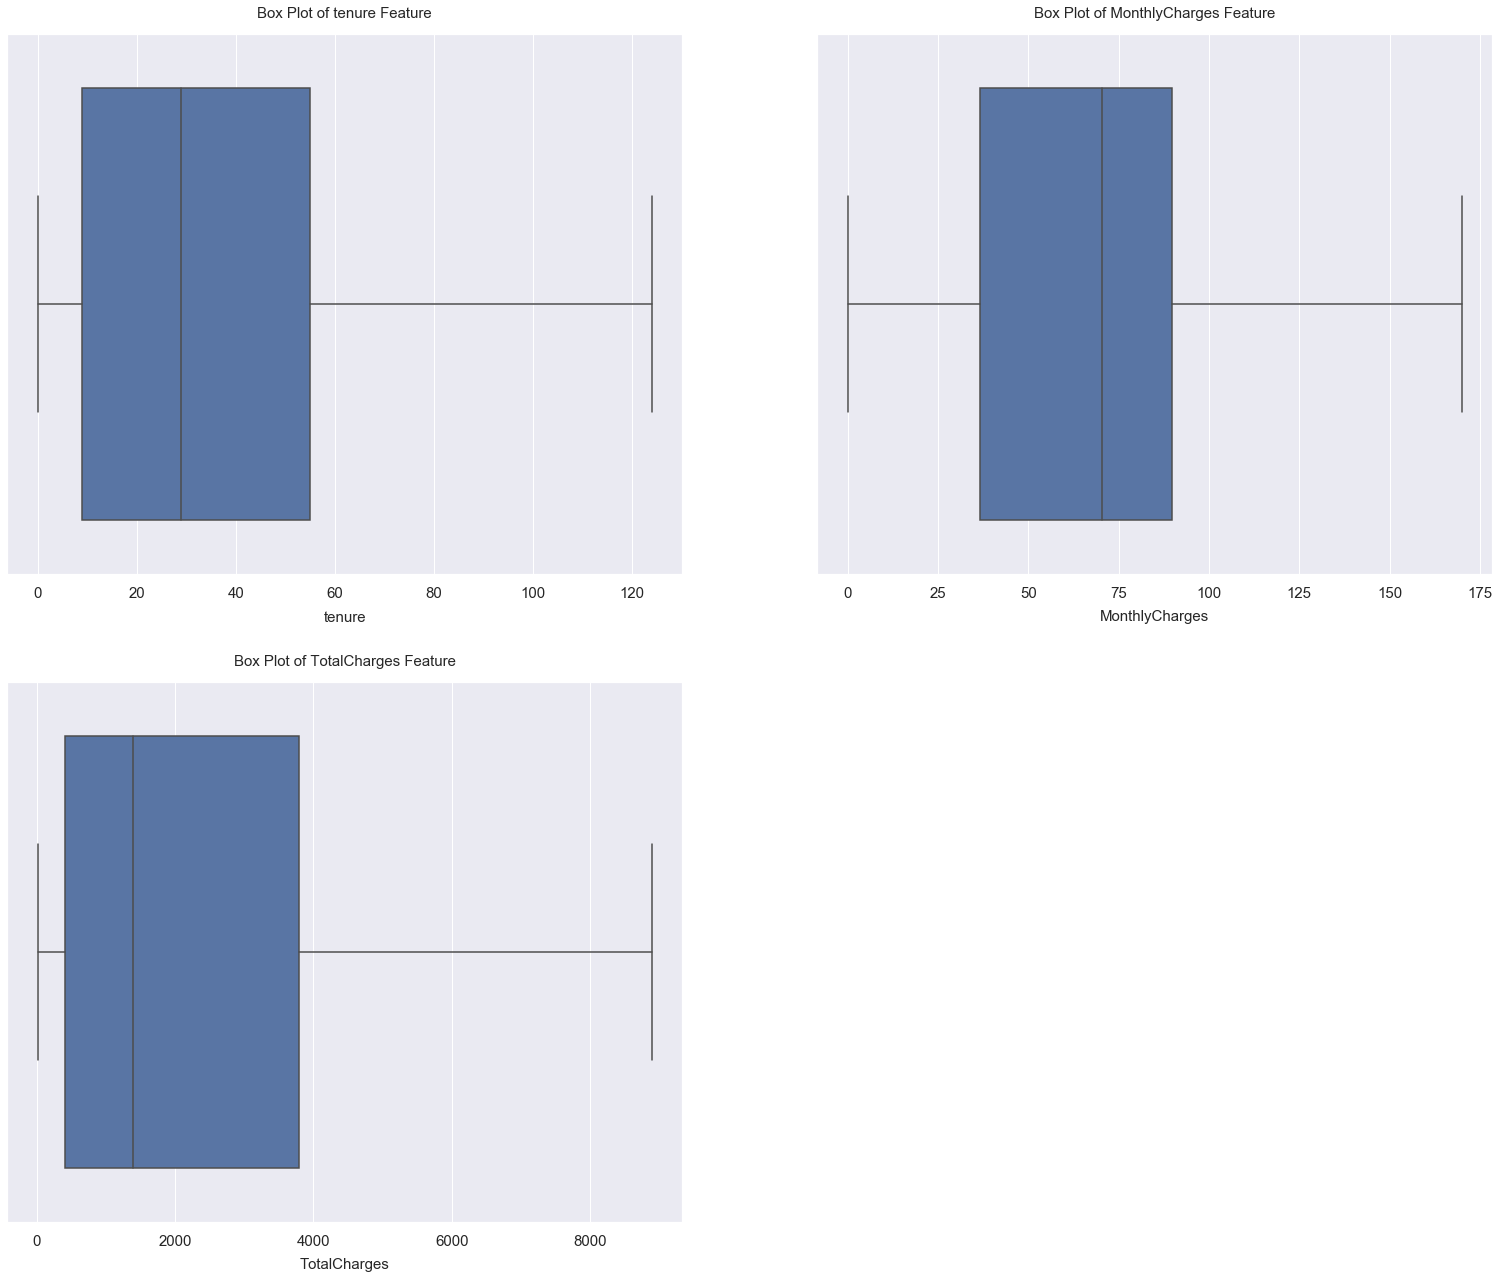

In [24]:
#Visualize the boxplot of numeric variables
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

features = ['tenure','MonthlyCharges','TotalCharges']

fig, ax = plt.subplots(figsize=(15,12))
plt.subplots_adjust(right=1.5, top=1.5)

for i, n in enumerate(features,1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_load[n])
        
    plt.xlabel('{}'.format(n), labelpad=10, size=15)
    plt.tick_params(axis='x', labelsize=15, size=8)
    plt.tick_params(axis='y', labelsize=15, size=8)
    plt.title('Box Plot of {} Feature'.format(n), y=1.02, size=15)
        
plt.show()

Using the same formula, we created a new boxplot visualization of numeric variables. There were outliers on each numeric variables at the first time, indicated by  the  dots  that far  away  from  the  boxplot.  The max column on the data description   is   also   shows   a   high   value   which   indicates  ouliers. After replacing the outliers value with maximum and minium value we created by using IQR formula, we can see that the boxplots of each numeric variable shows no outliers.

# Value Standardization

The last step on Data Cleansing is value standardization. It means `adjusting the value on each variable that has been set`.

### Detect Nonstandard value

Detect whether is there a value from categorical variables that nonstandard. This happens usually because of input data error. The diversity of  term  become  one  of  the  often  factors  that   happen.   Because   of   that, standardization needed to solve so.

In [25]:
df_load.columns

Index(['UpdatedAt', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [26]:
#Show unique values of each categorical variable
columns = ['gender','SeniorCitizen','Partner','Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn']

for i in columns:
    print('Unique Values of {} variable,'.format(i))
    print(df_load[i].value_counts())
    print('\n')

Unique Values of gender variable,
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64


Unique Values of SeniorCitizen variable,
0    5822
1    1128
Name: SeniorCitizen, dtype: int64


Unique Values of Partner variable,
No     3591
Yes    3359
Name: Partner, dtype: int64


Unique Values of Dependents variable,
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64


Unique Values of PhoneService variable,
Yes    6281
No      669
Name: PhoneService, dtype: int64


Unique Values of MultipleLines variable,
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64


Unique Values of InternetService variable,
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64


Unique Values of OnlineSecurity variable,
No                     3454
Yes                    1991
No internet service    1505
Name: OnlineSecurity, dtype: int64


Unique Values of 

After checking the unique values of each categorical variable, shown that there were three variables have not been standard that is gender, Dependents, and Churn. Seen that there were terms which have the same meaning.

### Standardization of Categorical Variables

After knowing which variable has nonstandard value, standard its value with the value that has been set each variable without changing its meaning.
Example :
- `Iya` -> Yes
- `Laki-Laki` -> Male
- `Churn` -> Yes

In [27]:
#Replacing nonstandard value
df_load['gender'].replace({'Laki-Laki':'Male', 'Wanita':'Female'}, inplace=True)
df_load['Dependents'].replace('Iya', 'Yes', inplace=True)
df_load['Churn'].replace('Churn', 'Yes', inplace=True)

In [28]:
#Show the unique values after standardization
columns = ['gender','Dependents','Churn']
for i in columns:
    print('Unique Values after standardization of {} variable,'.format(i))
    print(df_load[i].value_counts())
    print('\n')

Unique Values after standardization of gender variable,
Male      3505
Female    3445
Name: gender, dtype: int64


Unique Values after standardization of Dependents variable,
No     4870
Yes    2080
Name: Dependents, dtype: int64


Unique Values after standardization of Churn variable,
No     5114
Yes    1836
Name: Churn, dtype: int64




When we observe the unique values of each of the categorical variables, clearly seen there were a few variables that have nonstandard values. Among others were gender, Dependents, and Churn. After the standardization step, reobserve the unique values of categorical variables, shown that the unique values have been standard.

# Exploratory Data Analysis (EDA)

The exploratory data analysis enables data analyst to understand the context  of  data  used,  starting  from  distribution, frequency, correlation, etc. In general, EDA can be done with some of the ways,
- `Univariate Analysis` (descriptive analysis with only a variable)
- `Bivariate Analysis` (relation analysis with two variables)
- `Multivariate  Analysis`  (analysis  with  greater than  one  or  equal to  three
   variables)

### Percentage Visualization of Churn

The first analysis we do is univariate analysis, it is visualizing the percentage of the target variable Churn using a `pie chart`.

In [29]:
df_load['Churn'].value_counts()

No     5114
Yes    1836
Name: Churn, dtype: int64

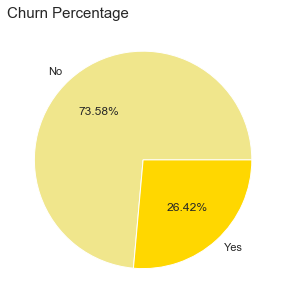

In [30]:
#Make a pie chart of ‘Churn’
plt.figure(figsize=(5,5))
plt.pie(df_load['Churn'].value_counts(), colors=['khaki', 'gold'], labels=['No', 'Yes'], autopct='%.2f%%')
plt.title("Churn Percentage", loc='left', fontsize=15)

plt.show()

Based on the pie chart, the percentage of customer who was not churned was greater than the percentage of customer who churned with its percentage of 73.58% and 26.42% respectively.

### Numeric Variables EDA

The next analysis is to select predictor variables that are numeric and make bivariate plots, then interpret them.

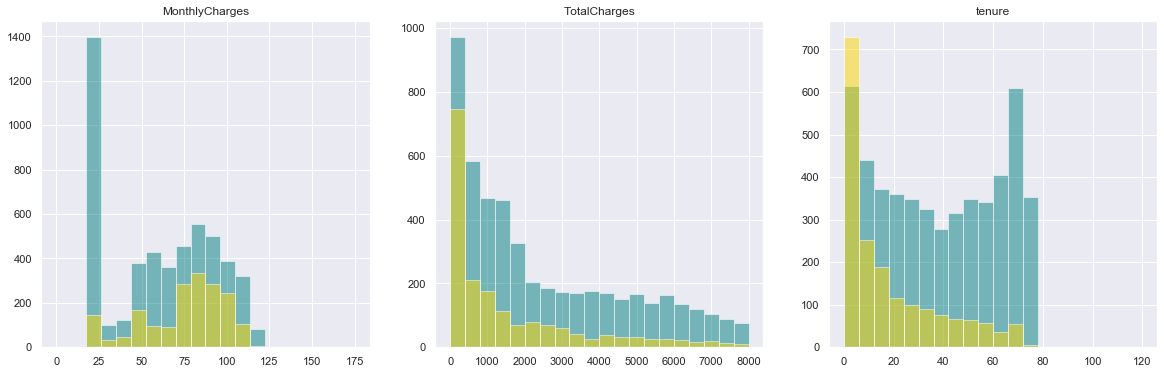

In [31]:
#Make bivariate plots of numeric variables

fig, ax = plt.subplots(1, 3, figsize=(20, 6))
df_load[df_load.Churn == 'No']['MonthlyCharges'].hist(bins=20, color='teal', alpha=0.5, ax=ax[0], range=(0,175))
df_load[df_load.Churn == 'Yes']['MonthlyCharges'].hist(bins=20, color='gold', alpha=0.5, ax=ax[0], range=(0,175))
df_load[df_load.Churn == 'No']['TotalCharges'].hist(bins=20, color='teal', alpha=0.5, ax=ax[1], range=(0,8000))
df_load[df_load.Churn == 'Yes']['TotalCharges'].hist(bins=20, color='gold', alpha=0.5, ax=ax[1], range=(0,8000))
df_load[df_load.Churn == 'No']['tenure'].hist(bins=20, color='teal', alpha=0.5, ax=ax[2], range=(0,120))
df_load[df_load.Churn == 'Yes']['tenure'].hist(bins=20, color='gold', alpha=0.5, ax=ax[2], range=(0,120))
ax[0].set_title('MonthlyCharges')
ax[1].set_title('TotalCharges')
ax[2].set_title('tenure')

plt.show()

Based on the graph above, it could be interpreted that,
- The smaller the value of `MonthlyCharges`, the number of Churn was also getting smaller.
- For the `TotalCharges` variable, there was no trend in the number of Churn.
- The longer of customer's `tenure`, the customer's churned was also getting smaller.

### Categorical Variables EDA

The next analysis was to select the predictor variables that categorical, then make a bivariate plot and interpret them. Using `countplot()`, we can make a chart of categorical variables as shown below.

In [32]:
df_load.columns

Index(['UpdatedAt', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

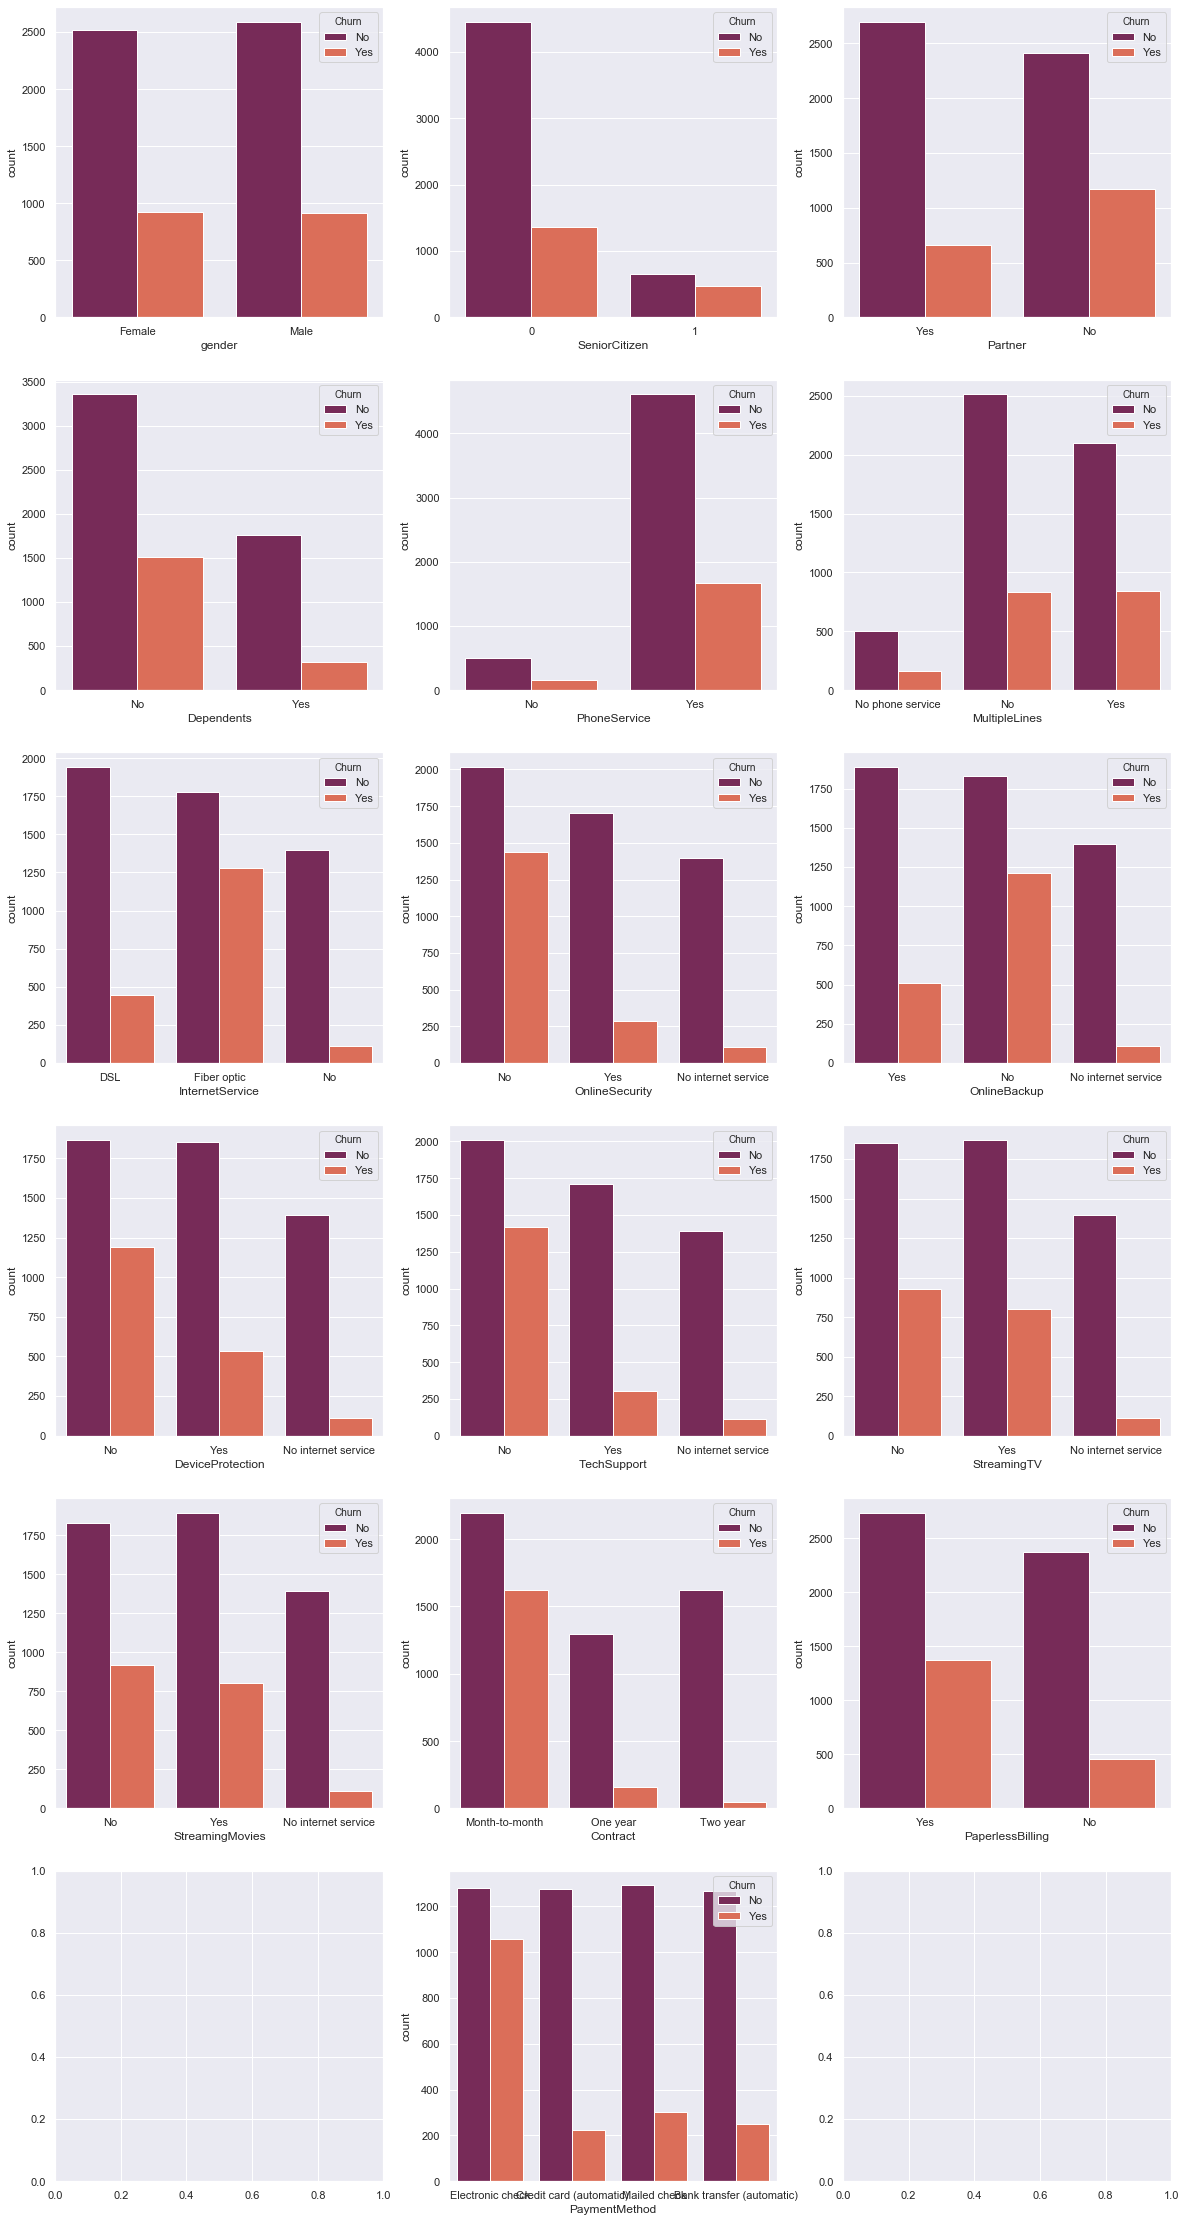

In [33]:
categoric = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

fig, ax = plt.subplots(6, 3, figsize=(20,40))

sns.countplot(x=df_load[categoric[0]], hue=df_load['Churn'], ax=ax[0][0], palette='rocket')
sns.countplot(x=df_load[categoric[1]], hue=df_load['Churn'], ax=ax[0][1], palette='rocket')
sns.countplot(x=df_load[categoric[2]], hue=df_load['Churn'], ax=ax[0][2], palette='rocket')
sns.countplot(x=df_load[categoric[3]], hue=df_load['Churn'], ax=ax[1][0], palette='rocket')
sns.countplot(x=df_load[categoric[4]], hue=df_load['Churn'], ax=ax[1][1], palette='rocket')
sns.countplot(x=df_load[categoric[5]], hue=df_load['Churn'], ax=ax[1][2], palette='rocket')
sns.countplot(x=df_load[categoric[6]], hue=df_load['Churn'], ax=ax[2][0], palette='rocket')
sns.countplot(x=df_load[categoric[7]], hue=df_load['Churn'], ax=ax[2][1], palette='rocket')
sns.countplot(x=df_load[categoric[8]], hue=df_load['Churn'], ax=ax[2][2], palette='rocket')
sns.countplot(x=df_load[categoric[9]], hue=df_load['Churn'], ax=ax[3][0], palette='rocket')
sns.countplot(x=df_load[categoric[10]], hue=df_load['Churn'], ax=ax[3][1], palette='rocket')
sns.countplot(x=df_load[categoric[11]], hue=df_load['Churn'], ax=ax[3][2], palette='rocket')
sns.countplot(x=df_load[categoric[12]], hue=df_load['Churn'], ax=ax[4][0], palette='rocket')
sns.countplot(x=df_load[categoric[13]], hue=df_load['Churn'], ax=ax[4][1], palette='rocket')
sns.countplot(x=df_load[categoric[14]], hue=df_load['Churn'], ax=ax[4][2], palette='rocket')
sns.countplot(x=df_load[categoric[15]], hue=df_load['Churn'], ax=ax[5][1], palette='rocket')

plt.show()

Based on the charts, it could be said that,
- There were no significant differences between the customers who churned by gender and PhoneService.
- There was a tendency of churned's customers were people who have no partner, the people who were a senior citizen, the people who have a streaming TV facility, the people who have internet facility, and the people who have paperless billing.

# Data Preprocessing

Manipulating the dataset before input to a model. Among others are delete the unnecessary column, encode, and split the dataset.

### Delete the unnecessary column

The first step of Data Preprocessing was to delete the column that would not be included in the model, then save it on another dataframe called `cleaned_df`.

In [34]:
#Make a new dataframe from previous dataframe
cleaned_df = df_load.drop(columns=['UpdatedAt','customerID','Dependents','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','Contract','PaymentMethod'])

In [35]:
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,StreamingTV,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,1.0,No,DSL,No,Yes,29.85,29.85,No
4722,Female,0,No,60.0,Yes,DSL,Yes,Yes,70.15,4224.70,No
4734,Male,0,Yes,39.0,Yes,DSL,Yes,No,80.00,3182.95,Yes
4733,Male,0,Yes,12.0,Yes,Fiber optic,No,Yes,84.60,959.90,No
4732,Female,0,Yes,71.0,Yes,No,No internet service,No,19.90,1397.30,No


### Encoding Data

Use cleaned_df data frame. To convert a string data into numeric type, use `LabelEncoder()`.

In [36]:
#Encoding data
import numpy as np
from sklearn.preprocessing import LabelEncoder

for i in cleaned_df.columns:
    if cleaned_df[i].dtype == np.number:
        continue
    cleaned_df[i] = LabelEncoder().fit_transform(cleaned_df[i])

In [37]:
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,StreamingTV,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1.0,0,0,0,1,29.85,29.85,0
4722,0,0,0,60.0,1,0,2,1,70.15,4224.70,0
4734,1,0,1,39.0,1,0,2,0,80.00,3182.95,1
4733,1,0,1,12.0,1,1,0,1,84.60,959.90,0
4732,0,0,1,71.0,1,2,1,0,19.90,1397.30,0


### Splitting Dataset

The last step before jump into modeling was splitting the dataset. Split the dataset into two pieces (70% of training data and 30% of testing data) based on predictor variables (X) and target variable (Y). Use `train_test_split()` to split the dataset. Save the splitting result by named `x_train`, `y_train`, `x_test`, and `y_test`.

In [38]:
from sklearn.model_selection import train_test_split

#Separate the predictor and target variable
X = cleaned_df.drop(columns='Churn')
y = cleaned_df['Churn']

#Splitting train dan test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('The shape of x_train and y_train are {} and {}'.format(x_train.shape, y_train.shape))
print('Churn percentage on Training data is \n{}'.format(y_train.value_counts(normalize=True)))


print('The shape of x_test and y_test are {} and {}'.format(x_test.shape, y_test.shape))
print('Churn percentage on Testing data is \n{}'.format(y_test.value_counts(normalize=True)))

The shape of x_train and y_train are (4865, 10) and (4865,)
Churn percentage on Training data is 
0    0.736691
1    0.263309
Name: Churn, dtype: float64
The shape of x_test and y_test are (2085, 10) and (2085,)
Churn percentage on Testing data is 
0    0.733813
1    0.266187
Name: Churn, dtype: float64


On these Data Preprocessing, there were variables that would not be needed to take into the model, then these variables need to be deleted. Encoding the nonnumeric variables into numeric type was also important, use LabelEncoder() to do so. And the last step was splitting the dataset into training and testing datasets.

# Machine Learning Modelling

### Logistic Regression

The  first  model  we  tried  was   the Logistic Regression Algorithm. Use `LogisticRegression()` to call those algorithms, fit the training data, and save as `log_model`.

In [39]:
#Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression().fit(x_train, y_train)

In [40]:
#Model yang terbentuk
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

After the model was made, calculate the model in order to know the `classification report` and `confusion matrix` of training data.

In [41]:
from sklearn.metrics import classification_report

#Predict
y_train_pred = log_model.predict(x_train)

#Classification report
print('Classification report of Training Model (Logistic Regression) \n{}'.format(classification_report(y_train, y_train_pred)))

Classification report of Training Model (Logistic Regression) 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3584
           1       0.65      0.48      0.55      1281

    accuracy                           0.80      4865
   macro avg       0.74      0.69      0.71      4865
weighted avg       0.78      0.80      0.78      4865



After getting the result of the classification report, visualize those reports.

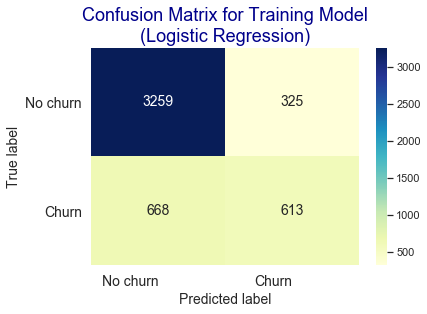

In [42]:
from sklearn.metrics import confusion_matrix

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Also, show the classification report and confusion matrix of testing data. Using the same formula, obtained that,

In [43]:
#Predict
y_test_pred = log_model.predict(x_test)

#Classification report
print('Classification report of Testing Model (Logistic Regression) \n{}'.format(classification_report(y_test, y_test_pred)))

Classification report of Testing Model (Logistic Regression) 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1530
           1       0.66      0.49      0.56       555

    accuracy                           0.80      2085
   macro avg       0.74      0.70      0.71      2085
weighted avg       0.78      0.80      0.78      2085



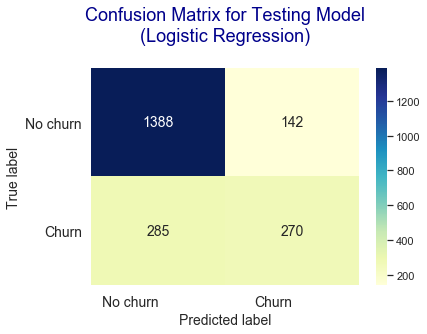

In [44]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Based on the analysis above, it could be concluded that if the model we used was a logistic regression algorithm, then the resulting was a model with default settings by sklearn.
- From `the training data`, it could be seen that the model was able to predict the data with `80% accuracy`, with the prediction of churned that actually churned was 613, the prediction of not churn that actually not churned was 3259,  the  prediction  of  not  churn  that  actually  churned  was  668, and the prediction of churn that actually not churn was 325.
- From `the testing data`, it could be seen that the model was able to predict the data with `80% accuracy`, with the prediction of churned that actually churned was 270, the prediction of not churn that actually not churned was 1388,  the  prediction  of  not  churn  that  actually  churned  was  285, and the prediction of churn that actually not churn was 142.



### Random Forest Classifier

The second model we tried was the Random Forest Classifier Algorithm. Use `RandomForestClassifier()` to call those algorithms, fit the training data, and save as `rdf_model`.

In [45]:
#Random Forest Classifier Algorithm
from sklearn.ensemble import RandomForestClassifier

rdf_model = RandomForestClassifier().fit(x_train, y_train)

In [46]:
rdf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

After the model was made, calculate the model in order to know the `classification report` and `confusion matrix` of training data.

In [47]:
#Predic
y_train_pred = rdf_model.predict(x_train)

#Classification report
print('Classification report of Training Model (Random Forest Classifier) \n{}'.format(classification_report(y_train, y_train_pred)))

Classification report of Training Model (Random Forest Classifier) 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3584
           1       1.00      0.99      0.99      1281

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



After getting the result of the classification report, visualize those reports. Using the same formula, this was the visualization.

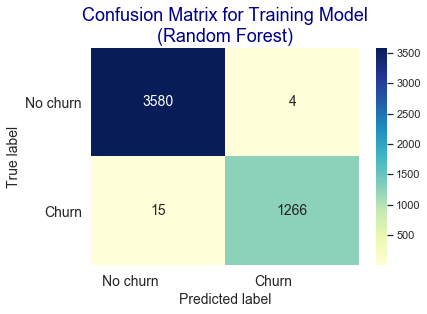

In [48]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Also, show the classification report and confusion matrix of testing data. Using the same formula, obtained that,

In [49]:
#Predict
y_test_pred = rdf_model.predict(x_test)

#Classification report
print('Classification Report of Testing Model (Random Forest Classifier) \n{}'.format(classification_report(y_test, y_test_pred)))

Classification Report of Testing Model (Random Forest Classifier) 
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1530
           1       0.61      0.47      0.53       555

    accuracy                           0.78      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.77      0.78      0.77      2085



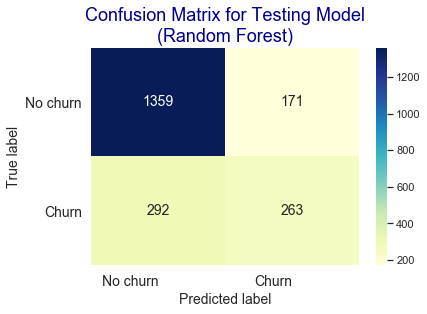

In [50]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Based on the analysis above, it could be concluded that if the model we used was a random forest classifier algorithm, then the resulting was a model with default settings by sklearn.
- From `the training data`, it could be seen that the model was able to predict the data with `100% accuracy`, with the prediction of churned that actually churned was 1266, the prediction of not churn that actually not churned was 3580,  the  prediction  of  not  churn  that  actually  churned  was  15, and the prediction of churn that actually not churn was 4.
- From `the testing data`, it could be seen that the model was able to predict the data with `78% accuracy`, with the prediction of churned that actually churned was 263, the prediction of not churn that actually not churned was 1359, the prediction of not churn that actually churned was 292, and the prediction of churn that actually not churn was 171.


### Gradient Boosting Classifier

The last model we tried was the Gradient Boosting Classifier Algorithm. Use `GradientBoostingClassifier()` to call those algorithms, fit the training data, and save as `rdf_model`.

In [51]:
#Gradient Boosting Classifier Algorithm
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier().fit(x_train, y_train)

In [52]:
gbt_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

After the model was made, calculate the model in order to know the `classification report` and `confusion matrix` of training data.

In [53]:
#Predict
y_train_pred = gbt_model.predict(x_train)

#Classification report
print('Classification Report of Training Model (Gradient Boosting Classifier) \n{}'.format(classification_report(y_train, y_train_pred)))

Classification Report of Training Model (Gradient Boosting Classifier) 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3584
           1       0.70      0.54      0.61      1281

    accuracy                           0.82      4865
   macro avg       0.78      0.73      0.75      4865
weighted avg       0.81      0.82      0.81      4865



After getting the result of the classification report, visualize those reports. Using the same formula, this was the visualization.

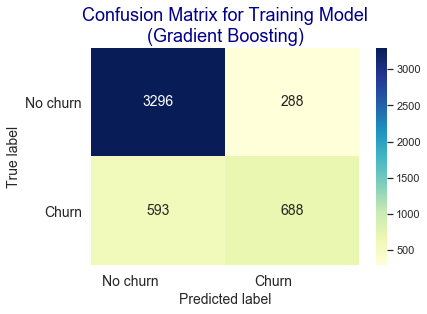

In [54]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Also, show the classification report and confusion matrix of testing data. Using the same formula, obtained that,

In [55]:
#Predict
y_test_pred = gbt_model.predict(x_test)

#Classification report
print('Classification Report of Testing Model (Gradient Boosting Classifier) \n{}'.format(classification_report(y_test, y_test_pred)))

Classification Report of Testing Model (Gradient Boosting Classifier) 
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1530
           1       0.65      0.50      0.56       555

    accuracy                           0.79      2085
   macro avg       0.74      0.70      0.71      2085
weighted avg       0.78      0.79      0.78      2085



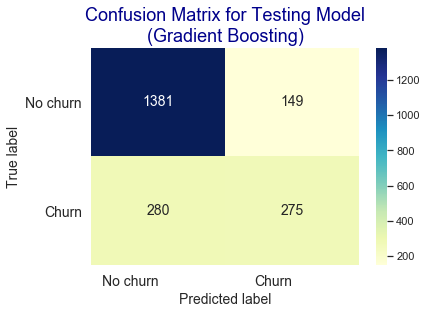

In [56]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Based on the analysis above, it could be concluded that if the model we used was a gradient boosting classifier algorithm, then the resulting was a model with default settings by sklearn.
- From `the training data`, it could be seen that the model was able to predict the data with `82% accuracy`, with the prediction of churned that actually churned was 688, the prediction of not churn that actually not churned was 3296,  the  prediction  of  not  churn  that  actually  churned  was  593, and the prediction of churn that actually not churn was 288.
- From `the testing data`, it could be seen that the model was able to predict the data with `79% accuracy`, with the prediction of churned that actually churned was 275, the prediction of not churn that actually not churned was 1381, the prediction of not churn that actually churned was 280, and the prediction of churn that actually not churn was 149.



# Choose the Best Model

The good model is a model that giving a good performance, both on training phase and testing phase.
- `Over-fitting` is a condition where the model is able to give a good prediction on training phase, but not able to give a prediction on testing phase as good as on the training phase.
- `Under-fitting` is a condition where the model is able to give a good prediction on testing phase, but not ables to give a prediction on training phase as good as on the testing phase.
- `Appropriate-fitting` adalah a condition where the model is able to give a good prediction both on the training phase and the testing phase.

# Conclusion

Based on modeling that has been done using Logistic Regression, Random Forest, and Gradient Boost Classifier, it can be displayed to predict the churn of telco customers by using this dataset, `the best model is to use the Logistic Regression algorithm`. This is because the performance of the Logistic Regression model tends to be able to predict the same both in the training and testing phases (`training accuracy 80%, testing accuracy 80%`), on the other hand the other algorithms tend to `over-fit their performance`.
Many factors affect the accuracy of the model, including `performing engineering features` or `adding values to the model parameters`. Don't be lazy to tinkering and do lots of experimenting to determine which one is the best.